# <center>Challenge 1 - House prices</center> 

![housesbanner](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

## Step 1: Defining the problem

Develop an algorithm to predict the sale price for each house based in the house's characteristics. This is a regression problem that will be solved using supervised learning. 

* Supervised learning: there are the features (characteristics) and the target.
* Regression problem: SalePrice variable (target) is a continuous variable.

## Step 2: Gather the Data
The dataset used in this project was the "House Prices - Advanced Regression Techniques" and it's available at Kaggle in the [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation).

## Step 3: Prepare Data for Consumption

The data was provided to us, so just data cleaning will be done.

### 3.1.1 Import general libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data
from datetime import date

### 3.1.2 Load Data Modelling Libraries

In [2]:
# Common Model Algoritms
import sklearn
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Common Model Libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn import model_selection


### 3.2 Meet Data

In [3]:
# Import data
df_raw = pd.read_csv('train.csv')

# Creat a copy of DataFrame data_raw 
df_clean = df_raw.copy(deep = True)
df_clean.shape

(1460, 81)

In [4]:
# Print the dataset
df_clean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The dataset is formed by 81 variables (potential predictor or independent variables) and 1460 entries, describing some aspect of homes.

* SalePrice - the property's sale price in dollars. This is the target variable (dependent variable) to predict.
* MSSubClass: Identifies the type of dwelling involved in the sale (discret variable / categorical) 
* MSZoning: The general zoning classification (discret variable / categorical)
* LotFrontage: Linear feet of street connected to property (escalar variable / numeric)
* LotArea: Lot size in square feet (escalar variable / numeric)
* Street: Type of road access (discret variable / categorical)
* Alley: Type of alley access (discret variable / categorical)
* LotShape: General shape of property (discret variable / categorical)
* LandContour: Flatness of the property (discret variable / categorical)
* Utilities: Type of utilities available (discret variable / categorical)
* LotConfig: Lot configuration (discret variable / categorical)
* LandSlope: Slope of property (discret variable / categorical)
* Neighborhood: Physical locations within Ames city limits (discret variable / categorical)
* Condition1: Proximity to main road or railroad (discret variable / categorical)
* Condition2: Proximity to main road or railroad (if a second is present) (discret variable / categorical)
* BldgType: Type of dwelling (discret variable / categorical)
* HouseStyle: Style of dwelling (discret variable / categorical)
* OverallQual: Overall material and finish quality (discret variable / categorical)
* OverallCond: Overall condition rating (discret variable / categorical)
* YearBuilt: Original construction date 
* YearRemodAdd: Remodel date 
* RoofStyle: Type of roof (discret variable / categorical)
* RoofMatl: Roof material (discret variable / categorical)
* Exterior1st: Exterior covering on house (discret variable / categorical)
* Exterior2nd: Exterior covering on house (if more than one material) (discret variable / categorical)
* MasVnrType**: Masonry veneer type (discret variable / categorical)
* MasVnrArea: Masonry veneer area in square feet (escalar variable / numeric)
* ExterQual: Exterior material quality (discret variable / categorical)
* ExterCond: Present condition of the material on the exterior (discret variable / categorical)
* Foundation: Type of foundation (discret variable / categorical)
* BsmtQual: Height of the basement (discret variable / categorical)
* BsmtCond: General condition of the basement (discret variable / categorical)
* BsmtExposure: Walkout or garden level basement walls (discret variable / categorical)
* BsmtFinType1: Quality of basement finished area (discret variable / categorical)
* BsmtFinSF1: Type 1 finished square feet (escalar variable / numeric)
* BsmtFinType2: Quality of second finished area (if present)(discret variable / categorical)
* BsmtFinSF2: Type 2 finished square feet (escalar variable / numeric)
* BsmtUnfSF: Unfinished square feet of basement area (escalar variable / numeric)
* TotalBsmtSF: Total square feet of basement area (escalar variable / numeric)
* Heating: Type of heating (discret variable / categorical)
* HeatingQC: Heating quality and condition (discret variable / categorical)
* CentralAir: Central air conditioning (discret variable / categorical)
* Electrical: Electrical system (discret variable / categorical)
* 1stFlrSF: First Floor square feet (escalar variable / numeric)
* 2ndFlrSF: Second floor square feet (escalar variable / numeric)
* LowQualFinSF: Low quality finished square feet (all floors) (escalar variable / numeric)
* GrLivArea: Above grade (ground) living area square feet (escalar variable / numeric)
* BsmtFullBath: Basement full bathrooms (escalar variable / numeric)
* BsmtHalfBath: Basement half bathrooms (escalar variable / numeric)
* FullBath: Full bathrooms above grade (escalar variable / numeric)
* HalfBath: Half baths above grade (escalar variable / numeric)
* Bedroom: Number of bedrooms above basement level (escalar variable / numeric)
* Kitchen: Number of kitchens (escalar variable / numeric)
* KitchenQual: Kitchen quality (discret variable / categorical)
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)(escalar variable / numeric)
* Functional: Home functionality rating (discret variable / categorical)
* Fireplaces: Number of fireplaces (escalar variable / numeric)
* FireplaceQu: Fireplace quality (discret variable / categorical)
* GarageType: Garage location (discret variable / categorical)
* GarageYrBlt: Year garage was built (escalar variable / numeric)
* GarageFinish: Interior finish of the garage (discret variable / categorical)
* GarageCars: Size of garage in car capacity (escalar variable / numeric)
* GarageArea: Size of garage in square feet (escalar variable / numeric)
* GarageQual: Garage quality (discret variable / categorical)
* GarageCond: Garage condition (discret variable / categorical)
* PavedDrive: Paved driveway (discret variable / categorical)
* WoodDeckSF: Wood deck area in square feet (escalar variable / numeric)
* OpenPorchSF: Open porch area in square feet (escalar variable / numeric)
* EnclosedPorch: Enclosed porch area in square feet (escalar variable / numeric)
* 3SsnPorch: Three season porch area in square feet (escalar variable / numeric)
* ScreenPorch: Screen porch area in square feet (escalar variable / numeric)
* PoolArea: Pool area in square feet (escalar variable / numeric)
* PoolQC: Pool quality (discret variable / categorical)
* Fence: Fence quality (discret variable / categorical)
* MiscFeature: Miscellaneous feature not covered in other categories (discret variable / categorical)
* MiscVal: $Value of miscellaneous feature (escalar variable / numeric)
* MoSold: Month Sold (discret variable / categorical)
* YrSold: Year Sold (discret variable / categorical)
* SaleType: Type of sale (discret variable / categorical)
* SaleCondition: Condition of sale (discret variable / categorical)


### 3.3 Feature engeneering
The feature engeneering will be made following 4 steps for correcting, completing, creating and converting features.


In [5]:
# Print a concise summary of a DataFrame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### **3.3.1. Correcting aberrant values and outliers**: 
This step we will done after complete exploratory analysis to determine if we should include or exclude from dataset.

#### **3.3.2. Completing missing values**: 
There are null values or missing data in the some variables: 

Variables|Null-values(abs)|Null-values(%)
:----------:|:----------------:|----------:
PoolQC|1453|99.5
MiscFeature|1406|96
Alley|1369|93
Fence|1179|80
FireplaceQu|690|47
LotFrontage |259|17
GarageType|81|5.54
GarageYrBlt|81|5.54
GarageFinish|81|5.54
GarageQual|81|5.54
GarageCond|81|5.54
BsmtQual|37|2.53
BsmtCond|37|2.53
BsmtFinType1|37|2.53
BsmtFinType2|38|2.6
BsmtExposure|38|2.6
MasVnrType|8|0.5
MasVnrArea|8|0.5
Electrical|1|0.068

Before start exploratory analysis, we using three methods to fix it:

* All variables with more 40% null values as 'Alley','Fireplaces','FireplaceQu', 'PoolQC', 'Fence','MiscFeature', will be removed. 
* In variables with less than 40% null values as 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBl', 'GarageFinish', 'GarageQual' and 'GarageCond', just the null values will be removed.
* Continuous variables as 'LotFrontage' and 'MasVnrArea' will be completed with mean of values.

The 'ID' is a random unique identifiers, that have no impact on target. Thus, it will be excluded from dataset.

In [6]:
# Complete or delete missing values in dataset (df_clean)

# Complete missing LotFrontage with mean
df_clean['LotFrontage'].fillna(df_clean['LotFrontage'].mean(), inplace = True)

# Complete missing MasVnrArea with mean
df_clean['MasVnrArea'].fillna(df_clean['MasVnrArea'].mean(), inplace = True)

# Delete the null values of features MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, GarageType, GarageYrBl, GarageFinish, GarageQual and GarageCond.   
df_clean.dropna(axis = 0, subset = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                     'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond'], inplace = True)
    
# Delete the variables Alley, Fireplaces, PoolQC, Fence, MiscFeature features/columns (have a lot (>40%) null value and 'Id')
drop_column = ['Alley','Fireplaces','FireplaceQu', 'PoolQC', 'Fence','MiscFeature', 'Id']
df_clean.drop(drop_column, axis=1, inplace = True)

In [7]:
# Visualization of the entries numbers after delete null values
print (df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemo

After remove the null values of the features, left 1338 entries to be analyzed.

#### **3.3.3. Creating new features for analysis**: 
The features 'HouseAge' and 'YearsWithoutRemod' will be create to determine if it's correlated with target(SalePrice).


In [8]:
# Creat the feature'Houseage'
atual_data = date.today()
atual_data.year
df_clean['HouseAge'] = atual_data.year - df_clean['YearBuilt']

# Creat the feature 'YearWithoutRemod'
atual_data = date.today()
atual_data.year
df_clean['YearWithoutRemod'] = atual_data.year - df_clean['YearRemodAdd']

# Print the dataset with the new features
df_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,YearWithoutRemod
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,18,18
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,45,45
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,20,19
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,106,51
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,21,21


#### **3.3.4. Converting features**: 

Considering that several variables are categorical (discret variable), before starting the analysis, this features will be convert in numeric features using One Hot encoder (for features with lowest cardinality) or Ordinal encoder (when order imports).


* **One Hot Encoder**

In [9]:
# Code categorical data (One Hot) of features included in list (features)
features = ['MSZoning', 'Street', 'LotShape', 'Utilities', 'LandSlope', 'Heating', 'Functional', 'Neighborhood', 'CentralAir', 'PavedDrive', 'RoofMatl', 'BldgType', 'SaleCondition', 'Condition2', 'SaleType']
df_clean_dummy = pd.get_dummies(df_clean[features])
df_clean_dummy.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,Condition2_RRNn,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# Join the features encoded with df_clean
df_clean = df_clean.join(df_clean_dummy)
df_clean

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Condition2_RRNn,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1


* **Ordinal Encoder**

In [11]:
# Code categorical data (Ordinal Encoder) the features 'ExterQual','ExterCond','HeatingQC', 'BsmtQual', 'KitchenQual','GarageQual'
import category_encoders as ce

# Instantiate encoder
enc_dict = [
    {'col': 'ExterQual', 'mapping': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}},
    {'col': 'BsmtQual', 'mapping': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}},
    {'col': 'BsmtCond', 'mapping': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}},
    {'col': 'KitchenQual', 'mapping': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}},
    {'col': 'ExterCond', 'mapping': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}},  
    {'col': 'HeatingQC', 'mapping': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}}, 
    {'col': 'GarageQual', 'mapping': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
    {'col': 'BsmtExposure', 'mapping': {'NA': 1, 'No': 2, 'Mn': 3, 'Av': 4, 'Go': 5}},
    {'col': 'GarageFinish', 'mapping': {'NA': 1, 'Unf': 2, 'Rfn': 3, 'Fin': 4}}]

encoder = ce.OrdinalEncoder(mapping = enc_dict)

# Creat a new dataset with all features (including the codering features)
df_clean_encoder = encoder.fit_transform(df_clean)
df_clean_encoder.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Condition2_RRNn,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# Print the list of features after codering
df_clean_encoder.columns.tolist()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch'

## Step 4: Exploratory Analysis 

Exploring the data with descriptive statistics and graphical visualization, to describe the variables. In this step, we can find some correlation between some features and the target.

### 4.1. Descriptive analysis of numeric features

In [13]:
# Creat a DataFrame with only numeric features 
df_clean_numeric = pd.DataFrame(data = df_clean_encoder, columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                            'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                            'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                            'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'GarageCars', 'GarageArea',
                            'PoolArea', 'MiscVal', 'MoSold', 'HouseAge', 'YearWithoutRemod', 'TotRmsAbvGrd', 
                            'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice'])


In [14]:
# Descriptive analysis
df_clean_numeric.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,PoolArea,MiscVal,MoSold,HouseAge,YearWithoutRemod,TotRmsAbvGrd,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,70.630187,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,...,3.010463,42.932735,6.331839,47.970852,35.331091,6.550075,99.384903,47.782511,2007.805680,186761.782511
std,22.161578,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,...,41.961337,508.056255,2.699437,29.563540,20.296463,1.585071,127.537065,65.362562,1.330691,78913.847668
min,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,11.000000,11.000000,3.000000,0.000000,0.000000,2006.000000,35311.000000
25%,60.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,...,0.000000,0.000000,5.000000,20.000000,17.000000,5.000000,0.000000,0.000000,2007.000000,135000.000000
50%,70.049958,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,...,0.000000,0.000000,6.000000,45.000000,26.500000,6.000000,6.000000,28.000000,2008.000000,168500.000000
75%,80.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,...,0.000000,0.000000,8.000000,65.000000,53.000000,7.000000,174.500000,70.000000,2009.000000,220000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,738.000000,15500.000000,12.000000,141.000000,71.000000,12.000000,857.000000,547.000000,2010.000000,755000.000000


### 4.2. Distribuition analysis

* #### Target (y) distribution

<AxesSubplot:xlabel='SalePrice'>

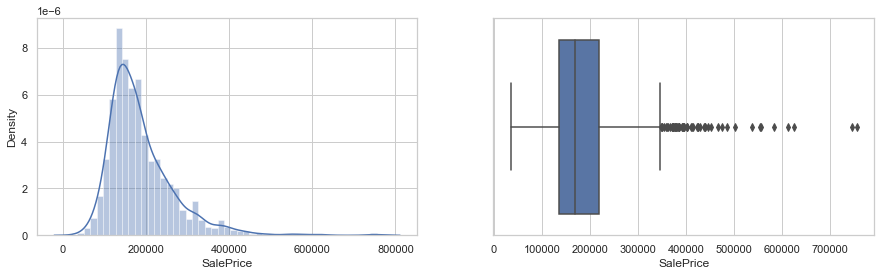

In [15]:
# Distribution of target (y)
sns.set_theme(style = "whitegrid")
sns.color_palette()
fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True)

plt.subplot(121)
sns.distplot(df_clean_encoder.SalePrice)
plt.subplot(122)
sns.boxplot(df_clean_encoder.SalePrice)


The most values of variable target (Sale Price) are concentrated between 180000 and 200000 dollars, where 75% are until 200000.


* #### Numeric features distribuition

<AxesSubplot:xlabel='MasVnrArea'>

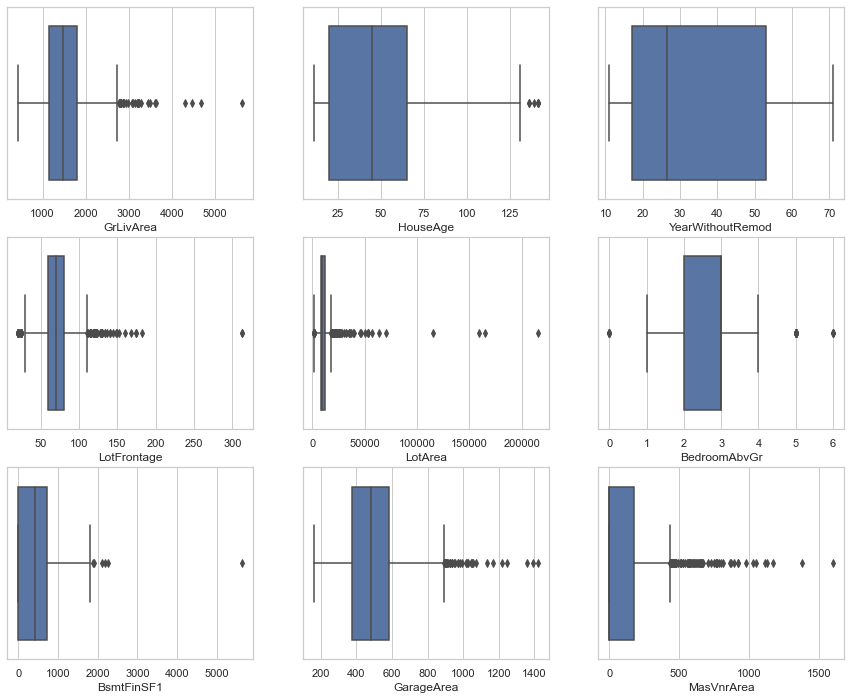

In [16]:
sns.set_theme(style="whitegrid")
sns.color_palette()
fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharey=True)

plt.subplot(331)
sns.boxplot(df_clean_encoder.GrLivArea)

plt.subplot(332)
sns.boxplot(df_clean_encoder.HouseAge)

plt.subplot(333)
sns.boxplot(df_clean_encoder.YearWithoutRemod)

plt.subplot(334)
sns.boxplot(df_clean_encoder.LotFrontage)

plt.subplot(335)
sns.boxplot(df_clean_encoder.LotArea)

plt.subplot(336)
sns.boxplot(df_clean_encoder.BedroomAbvGr)

plt.subplot(337)
sns.boxplot(df_clean_encoder.BsmtFinSF1)

plt.subplot(338)
sns.boxplot(df_clean_encoder.GarageArea)

plt.subplot(339)
sns.boxplot(df_clean_encoder.MasVnrArea)



Some informations can be noted in these analysis:
* Approximately 75% of houses have between 20 and 60 old years and have not been reformed for up to 20 until 50 years.
* The most of houses have until 11760 square feet of lot area. Fews have more of this.
* The most of houses have 2 or 3 bedroom.

### 4.3. Relationship analysis between some numeric features

<AxesSubplot:>

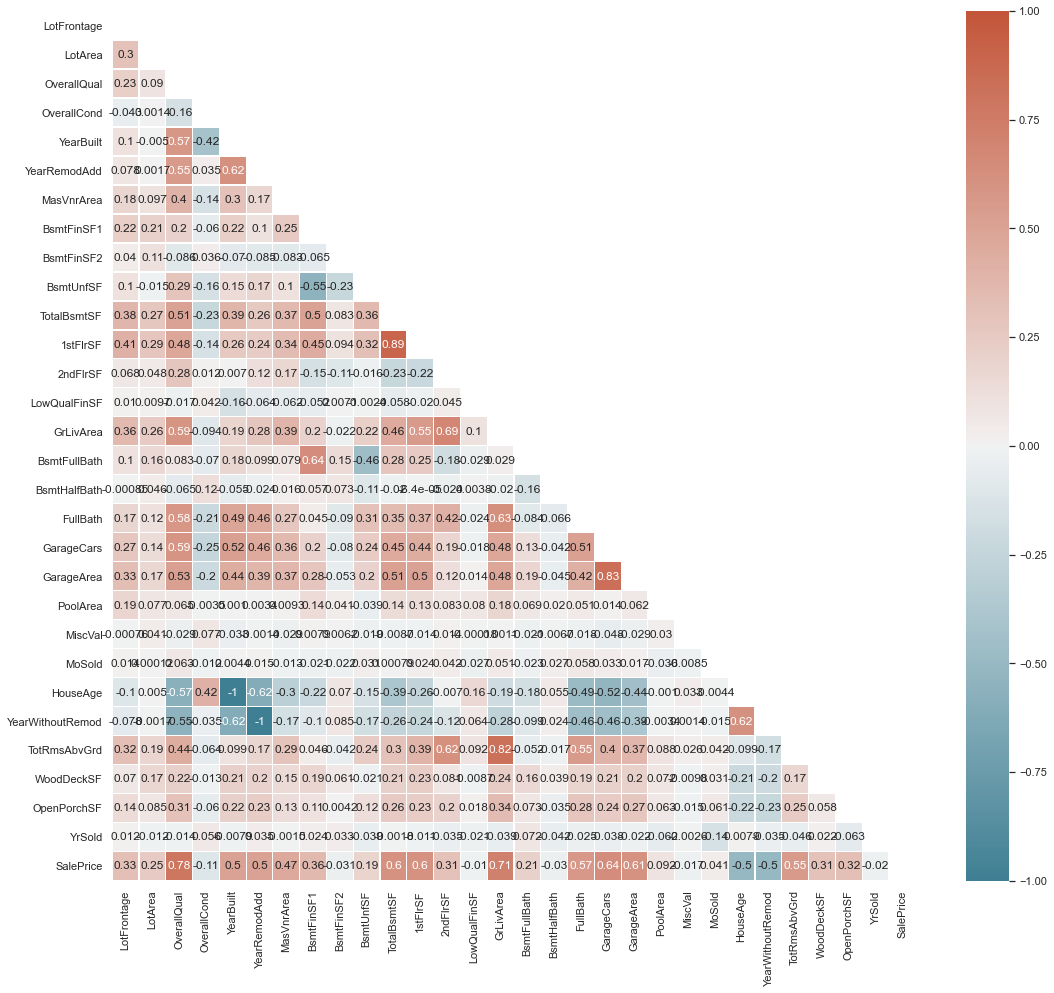

In [17]:
plt.subplots(figsize =(18, 16))
colormap = sns.diverging_palette(220, 20, as_cmap = True)

# Correlation calculation
corr = df_clean_numeric.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Using the upper triangle matrix as mask 
sns.heatmap(corr, annot = True, mask = matrix, cmap = colormap, 
            linewidths = 0.1,vmax = 1.0, linecolor = 'white', annot_kws = {'fontsize':12 })

Some features as 'OverallQual','TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath' and 'GarageCars' seem have significant correlation with target('SalePrice').

### 4.4. Relatioship between some categorical variables and target

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

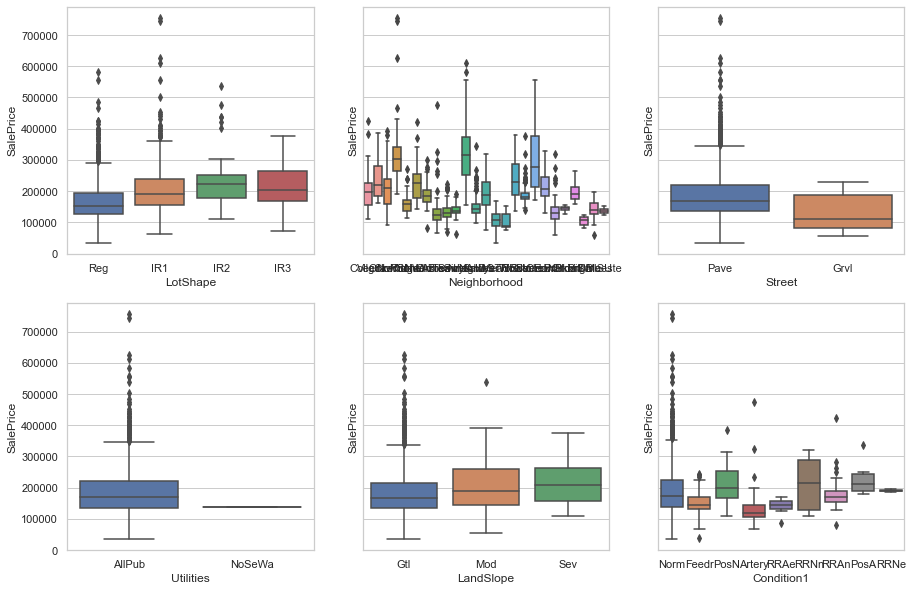

In [18]:
# Categorical variables vs target
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

sns.boxplot(ax = axes[0, 0], x = 'LotShape', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 1], x = 'Neighborhood', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 2], x = 'Street', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 0], x = 'Utilities', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 1], x = 'LandSlope', y = 'SalePrice', data = df_clean_encoder)

sns.boxplot(ax = axes[1, 2], x = 'Condition1', y = 'SalePrice', data = df_clean_encoder)

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

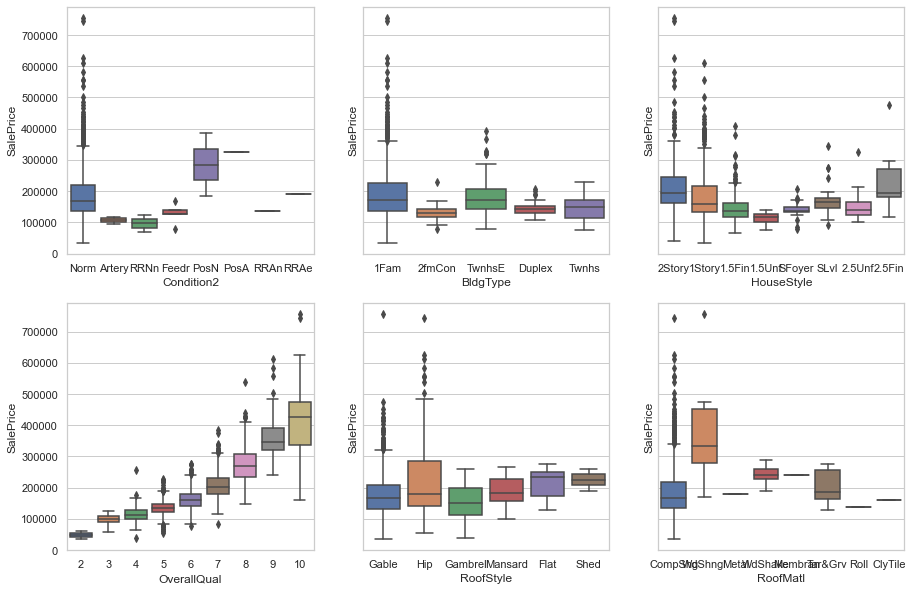

In [19]:
# Categorical variables vs target
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

sns.boxplot(ax = axes[0, 0], x = 'Condition2', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 1], x = 'BldgType', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 2], x = 'HouseStyle', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 0], x = 'OverallQual', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 1], x = 'RoofStyle', y = 'SalePrice', data = df_clean_encoder)

sns.boxplot(ax = axes[1, 2], x = 'RoofMatl', y = 'SalePrice', data = df_clean_encoder)

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

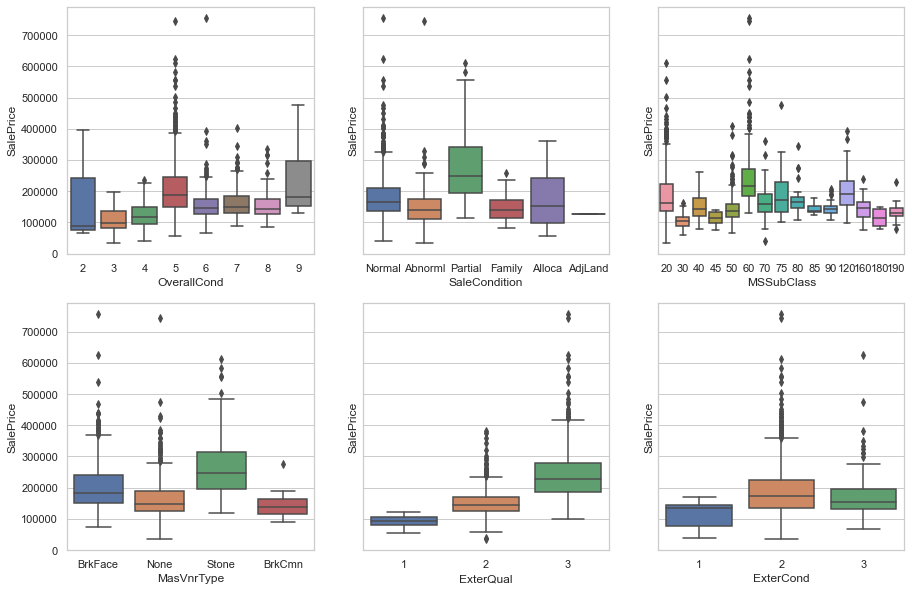

In [20]:
# Distribuition graph - Categorical variables
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

sns.boxplot(ax = axes[0, 0], x = 'OverallCond', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 1], x = 'SaleCondition', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 2], x = 'MSSubClass', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 0], x = 'MasVnrType', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 1], x = 'ExterQual', y = 'SalePrice', data = df_clean_encoder)

sns.boxplot(ax = axes[1, 2], x = 'ExterCond', y = 'SalePrice', data = df_clean_encoder)

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

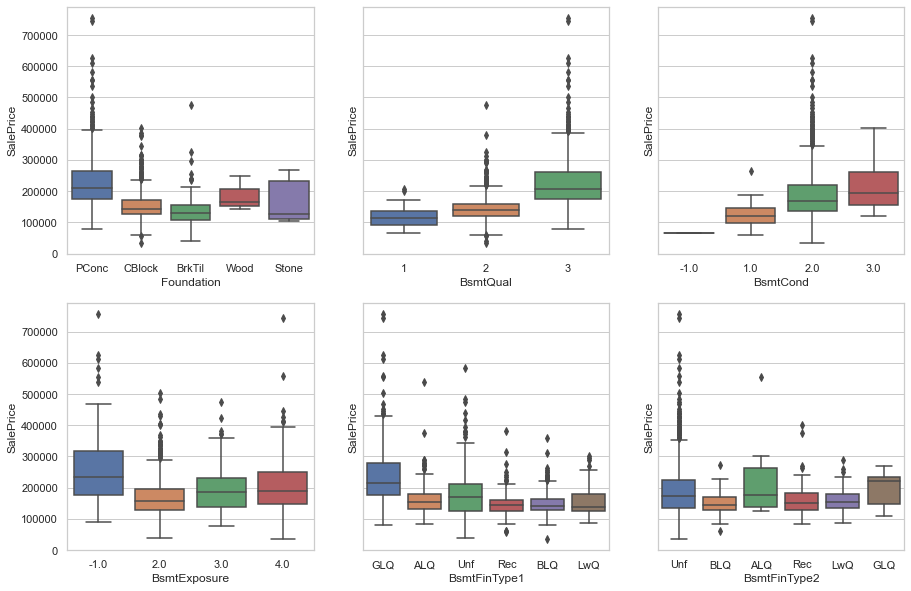

In [21]:
# Distribuition graph - Categorical variables
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

sns.boxplot(ax = axes[0, 0], x = 'Foundation', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 1], x = 'BsmtQual', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 2], x = 'BsmtCond', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 0], x = 'BsmtExposure', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 1], x = 'BsmtFinType1', y = 'SalePrice', data = df_clean_encoder)

sns.boxplot(ax = axes[1, 2], x = 'BsmtFinType2', y = 'SalePrice', data = df_clean_encoder)

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

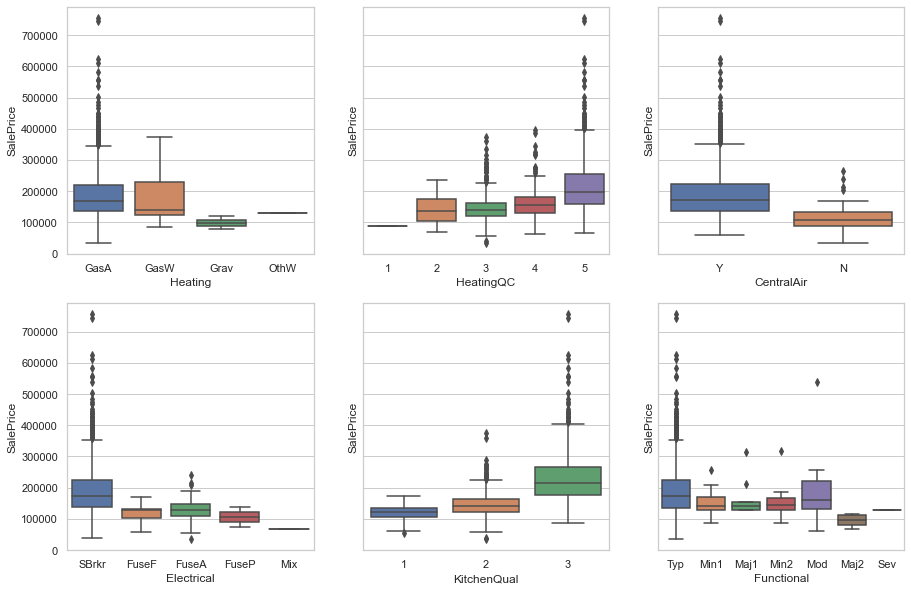

In [22]:
# Distribuition graph - Categorical variables
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

sns.boxplot(ax = axes[0, 0], x = 'Heating', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 1], x = 'HeatingQC', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 2], x = 'CentralAir', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 0], x = 'Electrical', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 1], x = 'KitchenQual', y = 'SalePrice', data = df_clean_encoder)

sns.boxplot(ax = axes[1, 2], x = 'Functional', y = 'SalePrice', data = df_clean_encoder)

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

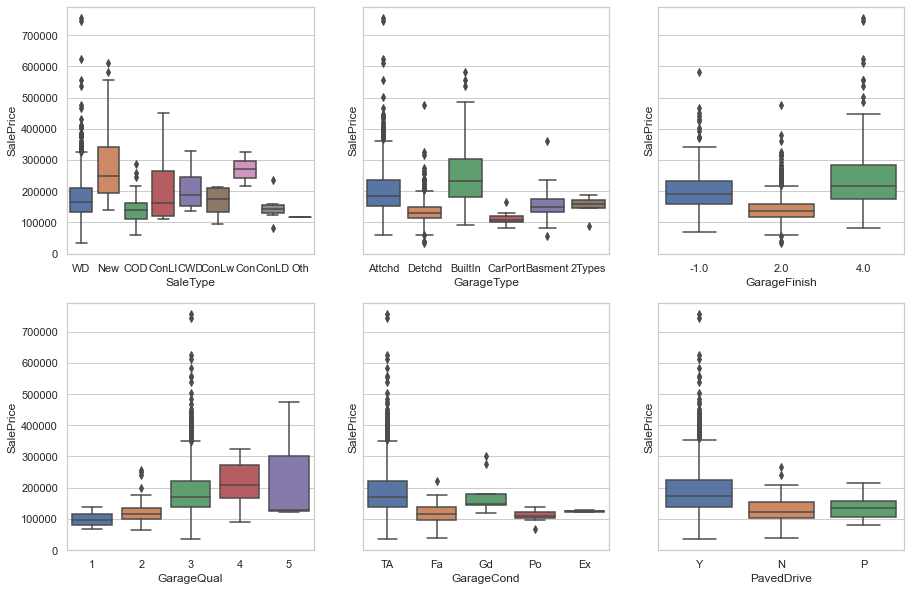

In [23]:
# Distribuition graph - Categorical variables
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

sns.boxplot(ax = axes[0, 0], x = 'SaleType', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 1], x = 'GarageType', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[0, 2], x = 'GarageFinish', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 0], x = 'GarageQual', y = 'SalePrice', data=df_clean_encoder)

sns.boxplot(ax = axes[1, 1], x = 'GarageCond', y = 'SalePrice', data = df_clean_encoder)

sns.boxplot(ax = axes[1, 2], x = 'PavedDrive', y = 'SalePrice', data = df_clean_encoder)

Observing the analyzes above, there are indications that:
* The sale price change according to the neighborhood.
* Houses in pave street have higher sale price.
* The sale price is different according with its localization('Condition 2').
* The sale price is different according with sale condition.
* Houses with better general material and finish, have higher sale price.
* The sale price change according to roof material and type.
* Houses with better quality of the material on the exterior, have higher sale price.
* Houses with better basement quality and general condition, have higher sale price.
* Houses with better heating quality and condition, kitchen quality and with central, have higher sale price.
* The sale price change according garage quality.

## Step 5: Model Data

### 5.1 Split x and y

In [24]:
# Define y variable target
y = ['SalePrice']

# Define x variables for original features aka feature selection
x = ['OverallQual', 'GrLivArea', 
    'YearBuilt', 
    'YearRemodAdd', 'BsmtFinSF1', '1stFlrSF', 'GarageCars', 
    'YearWithoutRemod','ExterQual', 'BsmtQual', 'KitchenQual', 'ExterCond', 'HeatingQC', 'GarageQual',
    'TotalBsmtSF',
    'LotArea',
    'BedroomAbvGr',
    'FullBath', 
    'HouseAge',  
    'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
    'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor','Neighborhood_Edwards',
    'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
    'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
    'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
    'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
    'Neighborhood_Veenker',
    'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
    'CentralAir_N','CentralAir_Y',
    'BsmtCond',
    'Street_Grvl','Street_Pave',
    'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
    'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
    'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
    'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
    'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 
    'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
    'SaleType_New', 'SaleType_Oth','SaleType_WD',
    'OverallCond',
    'BsmtExposure',
    'GarageFinish', 
    'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
    'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleType_COD']

print(x,y)
data_xy =  x + y

['OverallQual', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', '1stFlrSF', 'GarageCars', 'YearWithoutRemod', 'ExterQual', 'BsmtQual', 'KitchenQual', 'ExterCond', 'HeatingQC', 'GarageQual', 'TotalBsmtSF', 'LotArea', 'BedroomAbvGr', 'FullBath', 'HouseAge', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'CentralAir_N', 'CentralAir_Y', 'BsmtCond', 'Street_Grvl', 'Stree

### 5.2 Selecting models

Continuous (numeric) target variable requires a regression algorithm. It will be used some regressor algorithm from the sklearn library. We will use cross validation to train and test of models and scoring metrics, to rank and compare our algorithms’ performance.

Machine Learning Regression Algorithms:

* LGBMRegressor
* Decision Trees
* Random forest
* K-Nearest Neighbors
* Support Vector Machines (SVM)


In [25]:
# Creat a model list
MLA = [ensemble.RandomForestRegressor(),
       neighbors.KNeighborsRegressor(),svm.SVR(), tree.DecisionTreeRegressor(),
      lgb.LGBMRegressor()]

In [26]:
# Creating a table to compare MLA metrics
MLA_columns = ['MLA Name','MLA Train RMSE', 'MLA Test RMSE','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
print(MLA_compare)

Empty DataFrame
Columns: [MLA Name, MLA Train RMSE, MLA Test RMSE, MLA Time]
Index: []


In [27]:
# Random split dataset in cross-validation 
from sklearn.model_selection import KFold
cv_split = KFold(n_splits = 10, shuffle = True) 

# Index through MLA and save performance to table
row_index = 0
for alg in MLA:

    # Set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name 
    
   # Training and testing the models using cross validation 
    cv_results = model_selection.cross_validate(alg, df_clean_encoder[x], df_clean_encoder[y], scoring = "neg_root_mean_squared_error", cv = cv_split, return_train_score=True, return_estimator=True)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train RMSE'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test RMSE'] = cv_results['test_score'].mean()   
  
    row_index+=1   

In [28]:
# Print table
MLA_compare.sort_values(by = ['MLA Test RMSE'], ascending = False,  inplace = True)
MLA_compare

,MLA Name,MLA Train RMSE,MLA Test RMSE,MLA Time
4,LGBMRegressor,-14649.279961,-29079.934376,0.156531
0,RandomForestRegressor,-11456.965713,-29748.732598,1.184604
3,DecisionTreeRegressor,-122.264529,-45657.448381,0.023039
1,KNeighborsRegressor,-39452.625454,-48293.755045,0.006582
2,SVR,-80870.450967,-79913.194805,0.143731


Text(0, 0.5, 'Algorithm')

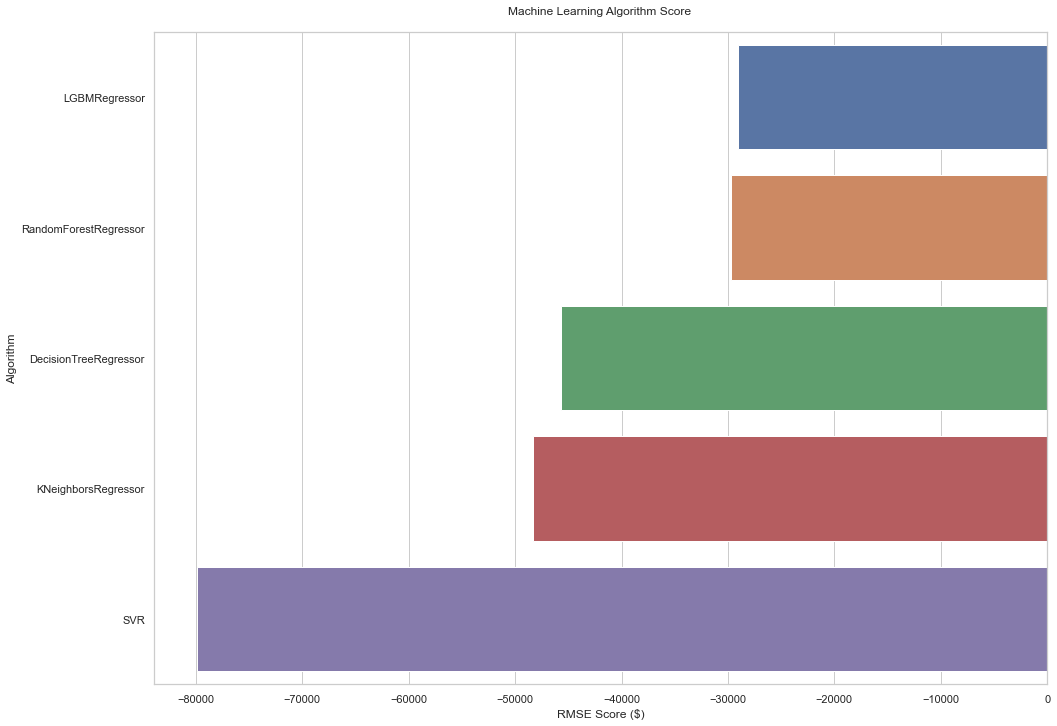

In [29]:
# Barplot to compare models performance
plt.figure(figsize=[16,12])
sns.barplot(x='MLA Test RMSE', y = 'MLA Name', data = MLA_compare, orient = None)
plt.title('Machine Learning Algorithm Score \n')
plt.xlabel('RMSE Score ($)')
plt.ylabel('Algorithm')


### 5.3  Tune Model with Hyper-Parameters

The model LightGBM had the best RMSE score (14093 on train and 28284 on test) compared to the others models. However considering that the test score is signifantly worse that train score, we can be considered that the model is overfitting. In the next steps we will train the model isolated and try improve it's predictions through hyper-parameters optimization.

When we used the model LGBMRegressor of the Lightgbm library, we accepted **all** the function defaults:

claclasslightgbm.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1, silent='warn', importance_type='split', **kwargs)

We will tune our model change some hyperparameters.

In [30]:
# Model with the best score - LGBMRegressor
gbm = lgb.LGBMRegressor()

In [31]:
# Train and test just the select model with cross validation
base_results = model_selection.cross_validate(gbm, df_clean_encoder[x], df_clean_encoder[y], scoring =  "neg_root_mean_squared_error", cv = 10, return_train_score=True, return_estimator=True)

In [32]:
print('BEFORE Parameters Optimized: ', gbm.get_params())
print(f"BEFORE Opt Training score mean: {base_results['train_score'].mean():.2f}") 
print(f"BEFORE Opt Validation score mean: {base_results['test_score'].mean():.2f}")

BEFORE Parameters Optimized:  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
BEFORE Opt Training score mean: -14691.99
BEFORE Opt Validation score mean: -28583.47


In [33]:
# Define the hyperparams combinations      
opt_hyper_params = {'max_depth' : [3, 4, 6, 8, 10, None],
    'learning_rate': [0.05, 0.06, 0.08],
    'min_samples_split' : [32, 64, 84],
    'min_samples_leaf' : [64, 84, 128],
    'min_child_samples': [20, 25, 30, 35],
    'num_leaves':[61, 71, 81, 91, 128],
    'n_estimators':[100, 120, 140, 160, 200, 250]
                  }
# Random test of combination using RandomizedSearchCV
tune_model = RandomizedSearchCV(gbm,
                    opt_hyper_params,
                    n_iter = 16,
                    scoring = 'neg_root_mean_squared_error',
                    cv = KFold(n_splits = 10, shuffle=True),
                    random_state = 0,
                    return_train_score = True)
lgb_model_opt = tune_model.fit(df_clean_encoder[x], df_clean_encoder[y])

#Print the score results of the all combinations
results = pd.DataFrame(lgb_model_opt.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_num_leaves,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_min_child_samples,param_max_depth,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.105917,0.031266,0.007121,0.000313,81,100,64,64,30,6,...,-23430.239027,-23164.035820,-23491.235173,-23829.014052,-23850.080365,-21836.406724,-23590.317416,-22312.327066,-23334.787570,679.593634
1,0.215090,0.012978,0.007966,0.000324,128,250,84,128,35,8,...,-18038.929272,-18114.003345,-17863.053608,-18378.767289,-18777.811774,-17264.410290,-17853.091450,-17113.367872,-18004.350406,503.509658
2,0.135301,0.024268,0.007290,0.000157,61,120,64,84,20,8,...,-18476.548716,-17955.254570,-18166.052734,-18683.437803,-18985.678575,-17305.919913,-18242.145792,-17685.552497,-18223.677177,468.802055
3,0.058319,0.001223,0.006928,0.000219,91,140,84,84,20,3,...,-20715.676886,-20059.931791,-20496.717369,-21094.787625,-21403.428449,-20220.544635,-21072.575201,-20827.322713,-20728.855565,399.339663
4,0.131682,0.017396,0.007209,0.000240,61,160,64,64,30,6,...,-21073.090121,-20713.609396,-20939.573615,-20953.245516,-21187.425045,-19089.533452,-20527.498368,-19563.416066,-20638.942383,701.224067


In [34]:
print('AFTER OPT Parameters: ', lgb_model_opt.best_params_)
print(f"AFTER OPT Training best score mean: {lgb_model_opt.cv_results_['mean_train_score'][lgb_model_opt.best_index_]:.2f}") 
print(f"AFTER OPT Test best score mean: {lgb_model_opt.cv_results_['mean_test_score'][lgb_model_opt.best_index_]:.2f}")
print('-'*10)

AFTER OPT Parameters:  {'num_leaves': 71, 'n_estimators': 160, 'min_samples_split': 84, 'min_samples_leaf': 64, 'min_child_samples': 20, 'max_depth': 4, 'learning_rate': 0.08}
AFTER OPT Training best score mean: -18118.11
AFTER OPT Test best score mean: -28006.70
----------


In [35]:
# Select the model with the best metric
lgb_opt = lgb_model_opt.best_estimator_.fit(df_clean_encoder[x], df_clean_encoder[y])
print(lgb_opt)

LGBMRegressor(learning_rate=0.08, max_depth=4, min_samples_leaf=64,
              min_samples_split=84, n_estimators=160, num_leaves=71)


## 6. Save model

<AxesSubplot:ylabel='Density'>

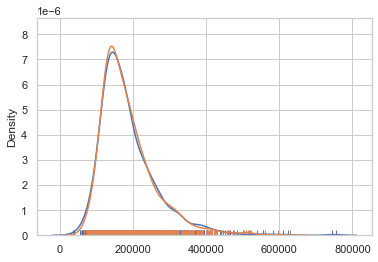

In [36]:
# Comparing the distribuition of real values (y) with the predicted values by  lgb_opt model

predict_test = lgb_opt.predict(df_clean_encoder[x])

# Distribuition map
sns.distplot(df_clean_encoder[y], hist = False, rug = True)
sns.distplot([predict_test], hist = False, rug = True)


After have optimized the model there was a reduce of overfitting and as shown above, the model could predict the real sale price with good precision, so this will be the final model.


# 7. Predict with new data

In [37]:
# Import test dataset 
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 7.1. Feature engeneering 

In [38]:
# Preview the info data
print (df_test.info())

# Identifing the null values of both datasets
print('Train columns with null values:\n', df_test.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### **7.1.1. Completing missing values**: 

In [39]:
# Complete missing LotFrontage with mean
df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(), inplace = True)

# Complete missing MasVnrArea with mean
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean(), inplace = True)

# Complete missing BsmtFinSF1 with mean
df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean(), inplace = True)

# Complete missing TotalBsmtSF with mean
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean(), inplace = True)

# Complete missing GarageCarsF with mean
df_test['GarageCars'].fillna(df_test['GarageCars'].mean(), inplace = True)

# Delete the null values of features MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, GarageType, GarageYrBl, GarageFinish, GarageQual and GarageCond.   
df_clean.dropna(axis = 0, subset = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                     'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond'], inplace = True)

# Delete the Alley, Fireplaces, PoolQC, Fence, MiscFeature features/columns (have a lot (>50%) null value)
drop_column = ['Alley','Fireplaces','FireplaceQu', 'PoolQC', 'Fence','MiscFeature', 'Id']
df_test.drop(drop_column, axis=1, inplace = True)

In [41]:
# Confirm that there are not any null value
print (df_test.info())
print(df_test.isnull().sum())
print("-"*10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

#### **7.1.2. Creating new features for analysis**: 
The features 'HouseAge' and 'YearsWithoutRemod' will be create to determine if it's correlated with target(SalePrice).


In [42]:
# Creat the feature'Houseage'
atual_data = date.today()
atual_data.year
df_test['HouseAge'] = atual_data.year - df_test['YearBuilt']

# Creat the feature 'YearWithoutRemod'
atual_data = date.today()
atual_data.year
df_test['YearWithoutRemod'] = atual_data.year - df_test['YearRemodAdd']
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,YearWithoutRemod
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,120,0,0,6,2010,WD,Normal,60,60
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,12500,6,2010,WD,Normal,63,63
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,3,2010,WD,Normal,24,23
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,6,2010,WD,Normal,23,23
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,144,0,0,1,2010,WD,Normal,29,29


#### **7.1.3. Converting features**: 

* **One Hot Encoder**

In [43]:
# Code categorical data (One Hot) of features included in list (features)
features = ['MSZoning', 'Street', 'LotShape', 'Utilities', 'LandSlope', 'Heating', 'Functional', 'Neighborhood', 'CentralAir', 'PavedDrive', 'RoofMatl', 'BldgType', 'SaleCondition', 'Condition2', 'SaleType']
df_test_dummy = pd.get_dummies(df_test[features])
df_test_dummy.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,Condition2_PosN,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# Join the features encoded with df_clean
df_test = df_test.join(df_test_dummy)
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Condition2_PosN,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1


* **Ordinal Encoder**

In [45]:
# Instantiate encoder
enc_dict = [
    {'col': 'ExterQual', 'mapping': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}},
    {'col': 'BsmtQual', 'mapping': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}},
    {'col': 'BsmtCond', 'mapping': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}},
    {'col': 'KitchenQual', 'mapping': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}},
    {'col': 'ExterCond', 'mapping': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}},  
    {'col': 'HeatingQC', 'mapping': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}}, 
    {'col': 'GarageQual', 'mapping': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
    {'col': 'BsmtExposure', 'mapping': {'NA': 1, 'No': 2, 'Mn': 3, 'Av': 4, 'Go': 5}},
    {'col': 'GarageFinish', 'mapping': {'NA': 1, 'Unf': 2, 'Rfn': 3, 'Fin': 4}}]
encoder = ce.OrdinalEncoder(mapping = enc_dict)

In [46]:
# Codering the features
df_test_encoder = encoder.fit_transform(df_test)
df_test_encoder.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Condition2_PosN,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1


### 7.2. Define x_test variables for predict

In [47]:
df_test_predict = pd.DataFrame(data = df_test_encoder, columns = ['OverallQual', 'GrLivArea', 
    'YearBuilt', 
    'YearRemodAdd', 'BsmtFinSF1', '1stFlrSF', 'GarageCars', 
    'YearWithoutRemod','ExterQual', 'BsmtQual', 'KitchenQual', 'ExterCond', 'HeatingQC', 'GarageQual',
    'TotalBsmtSF',
    'LotArea',
    'BedroomAbvGr',
    'FullBath', 
    'HouseAge',  
    'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
    'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor','Neighborhood_Edwards',
    'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
    'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
    'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
    'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
    'Neighborhood_Veenker',
    'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
    'CentralAir_N','CentralAir_Y',
    'BsmtCond',
    'Street_Grvl','Street_Pave',
    'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
    'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
    'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
    'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
    'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 
    'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
    'SaleType_New', 'SaleType_Oth','SaleType_WD',
    'OverallCond',
    'BsmtExposure',
    'GarageFinish', 
    'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
    'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleType_COD'])


### 7.3. Make the predict

In [48]:
# Make the predict
my_predictions =  lgb_opt.predict(df_test_predict)
my_predictions

array([122039.93721943, 161022.57909984, 177246.602635  , ...,
       156704.1320964 , 132495.92123622, 219909.08977182])

In [49]:
# Include the column 'Sale Predict' with the values of my_predictions
df_test_predict['SalePredict'] = my_predictions
df_test_predict

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,BsmtFinSF1,1stFlrSF,GarageCars,YearWithoutRemod,ExterQual,BsmtQual,...,BsmtExposure,GarageFinish,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SalePredict
0,5,896,1961,1961,468.0,896,1.0,60,2,2.0,...,2.0,2.0,0,0,0,0,1,0,0,122039.937219
1,6,1329,1958,1958,923.0,1329,1.0,63,2,2.0,...,2.0,2.0,0,0,0,0,1,0,0,161022.579100
2,5,1629,1997,1998,791.0,928,2.0,23,2,3.0,...,2.0,4.0,0,0,0,0,1,0,0,177246.602635
3,6,1604,1998,1998,602.0,926,2.0,23,2,2.0,...,2.0,4.0,0,0,0,0,1,0,0,193780.006829
4,8,1280,1992,1992,263.0,1280,2.0,29,3,3.0,...,2.0,-1.0,0,0,0,0,1,0,0,193616.651459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,1970,1970,0.0,546,0.0,51,2,2.0,...,2.0,-1.0,0,0,0,0,1,0,0,94756.576720
1455,4,1092,1970,1970,252.0,546,1.0,51,2,2.0,...,2.0,2.0,1,0,0,0,0,0,0,84192.617727
1456,5,1224,1960,1996,1224.0,1224,2.0,25,2,2.0,...,2.0,2.0,1,0,0,0,0,0,0,156704.132096
1457,5,970,1992,1992,337.0,970,0.0,29,2,3.0,...,4.0,-1.0,0,0,0,0,1,0,0,132495.921236


### 8. Preparing the predict data to Kaggle submission

In [50]:
# Import the submission sample
submission = pd.read_csv('sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [51]:
# Replace the submission sample with the predict values
submission['SalePrice'] = my_predictions
submission

,Id,SalePrice
0,1461,122039.937219
1,1462,161022.579100
2,1463,177246.602635
3,1464,193780.006829
4,1465,193616.651459
...,...,...
1454,2915,94756.576720
1455,2916,84192.617727
1456,2917,156704.132096
1457,2918,132495.921236


In [53]:
# Save the data as csv to submite
submission.to_csv('git_submission_house_price_lgb.csv', index=False)

### 9. Conclusion

This notebook implemeted a default process for analyze of dataset House Prices. The data were processed and visualized. Than a regressor model was built trying to predict the houses sale prices based on the available features. Five regressor models were tested and LightGBM showed the best results. In order to improve those results, a hyperparameter optimization step was implemented to fine-tune the model.